In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# import seaborn as sns
# # sns.set_theme(style="whitegrid")
# # sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("paper")

## Addition

In [3]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,MET,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,MET,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,MET,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,MET,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,MET,2885.904018,3.1989,2.86,9148.854,8253.685491


In [4]:
adder_df["Design"].replace("Addition_Original", "Add-STD", inplace=True)
adder_df["Design"].replace("Addition_HUB", "Add-HUB", inplace=True)
adder_df.head()
adder_df.tail()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
31,Add-HUB,32,800,VIOLATED,4237.363239,5.8147,1.28,7442.816,5423.824946
32,Add-HUB,32,850,VIOLATED,4346.025643,6.1477,1.26,7746.102,5475.992310
33,Add-HUB,32,900,VIOLATED,4451.395243,6.2239,1.22,7593.158,5430.702196
34,Add-HUB,32,950,VIOLATED,4520.779247,6.3361,1.18,7476.598,5334.519511
35,Add-HUB,32,1000,VIOLATED,5220.734450,7.5200,1.11,8347.200,5795.015240


In [5]:
# Remove non-constrained case
# adder_df = adder_df[adder_df["Freq"]!=0]
# adder_df = adder_df[adder_df["Delay"] <= round(1000/adder_df["Freq"], 2)]
adder_df = adder_df.query('Slack == "MET" & Freq != 0')

area_df = adder_df[["Area", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = adder_df[["ADP", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design      Add-STD      Add-HUB
Freq                            
200     2500.646407  2390.102410
250     2500.646407  2390.102410
300     2622.009612  2416.915211
350     2885.904018  2525.577616
400     2940.940819  2661.758424

In [6]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Add-HUB'] / area_df['Area']['Add-STD']
power_gain = 100 * power_df['Power']['Add-HUB'] / power_df['Power']['Add-STD']
delay_gain = 100 * delay_df['Delay']['Add-HUB'] / delay_df['Delay']['Add-STD']
energy_gain = 100 * energy_df['Energy']['Add-HUB'] / energy_df['Energy']['Add-STD']
adp_gain = 100 * ADP_df['ADP']['Add-HUB'] / ADP_df['ADP']['Add-STD']

energy_gain

Freq
200     82.939560
250    111.484550
300     89.551709
350     92.872550
400     98.239649
450     99.775360
500     82.543030
550     89.240638
600     88.175239
650     80.223028
700           NaN
750           NaN
dtype: float64

In [7]:
gain_df = pd.DataFrame([
    area_gain,
    # power_gain,
    # delay_gain,
    energy_gain,
    adp_gain
]
).drop([700, 750], axis=1).T

gain_df.columns = [
    'Area', 
    # 'Power',
    # 'Delay', 
    'Energy', 
    'ADP'
    ]
gain_df

,Area,Energy,ADP
Freq,,,
200,95.579383,82.939560,84.611257
250,95.579383,111.484550,90.776399
300,92.177969,89.551709,92.177969
350,87.514262,92.872550,87.514262
400,90.507038,98.239649,90.507038
450,100.242572,99.775360,100.242572
500,86.808291,82.543030,86.808291
550,90.544465,89.240638,90.544465
600,91.081453,88.175239,91.081453


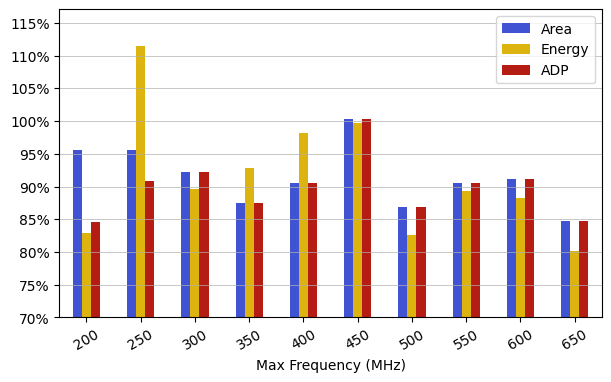

In [8]:
# colors = ['#1779ba', '#ffab00', '#36b37e', '#ff5630']
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']
# colors = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']


ax = gain_df.plot.bar(
    rot=30,
    color=colors,
    figsize=(7,4)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_yticks(range(70, 115+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
plt.ylim(70)
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.12, 1))
plt.legend(loc='best')
# plt.title('Hardware requirements of HUB Posit adder with respect to standard adder')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5)

plt.savefig('figs/adder_rate.pdf', bbox_inches="tight")
plt.show()

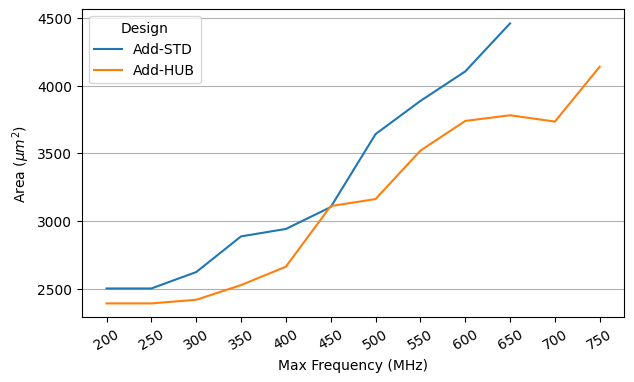

In [9]:
ax1 = area_df.plot.line(
	y="Area",
	rot = 30,
	ylabel="Area ($\mu m^2$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 750+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = area_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/adder_area.pdf', bbox_inches="tight")
plt.show()

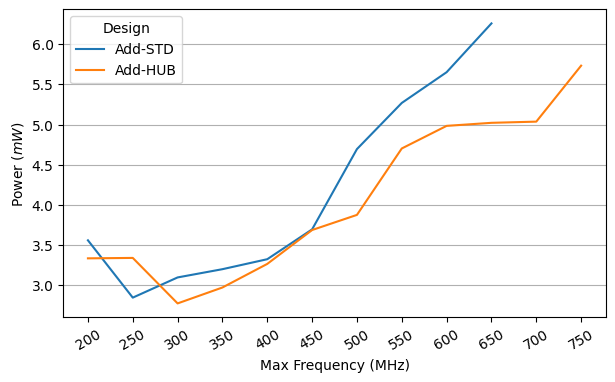

In [10]:
ax1=power_df.plot.line(
	y="Power",
	rot = 30,
	ylabel="Power ($mW$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 750+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/adder_power.pdf', bbox_inches="tight")
plt.show()

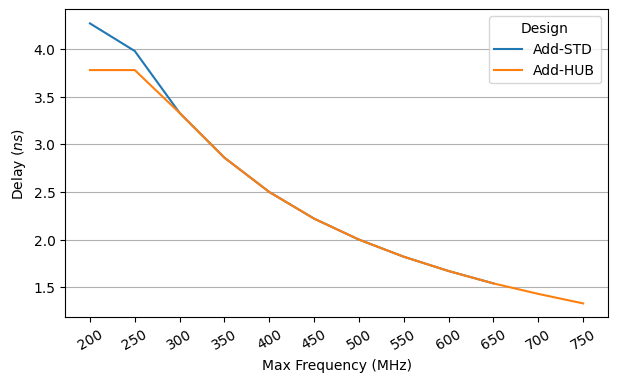

In [11]:
ax1=delay_df.plot.line(
	y="Delay",
	rot = 30,
	ylabel="Delay ($ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 750+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/adder_delay.pdf', bbox_inches="tight")
plt.show()

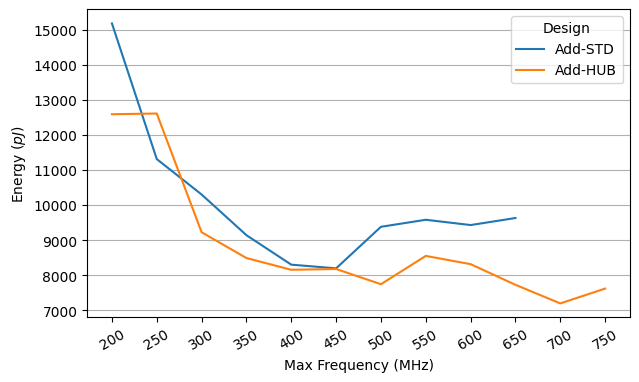

In [12]:
ax1=energy_df.plot.line(
    y="Energy",
    rot = 30,
    ylabel="Energy ($pJ$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 750+1, 50))

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/adder_energy.pdf', bbox_inches="tight")
plt.show()

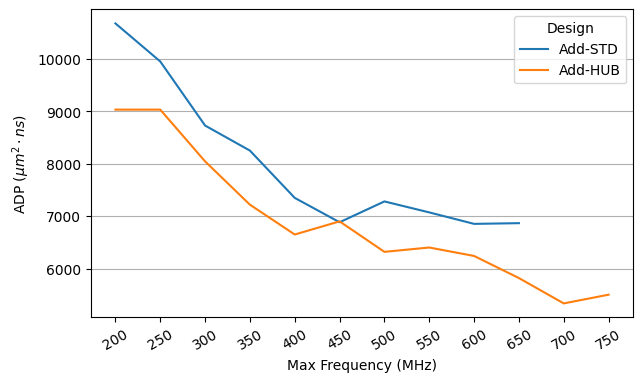

In [13]:
ax1=ADP_df.plot.line(
	y="ADP",
	rot = 30,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 750+1, 50))

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/adder_adp.pdf', bbox_inches="tight")
plt.show()

## Multiplication

In [14]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Multiplication_Original,32,0,MET,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Multiplication_Original,32,200,MET,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Multiplication_Original,32,250,MET,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Multiplication_Original,32,300,MET,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Multiplication_Original,32,350,MET,8145.446484,15.1352,2.85,43135.320,23214.522479


In [15]:
mult_df["Design"].replace("Multiplication_Original", "Mult-STD", inplace=True)
mult_df["Design"].replace("Multiplication_HUB", "Mult-HUB", inplace=True)
mult_df.head()
mult_df.tail()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
39,Mult-HUB,32,1000,VIOLATED,12422.793778,24.5954,1.64,40336.456,20373.381796
40,Mult-HUB,32,1050,VIOLATED,12701.270586,24.9945,1.67,41740.815,21211.121879
41,Mult-HUB,32,1100,VIOLATED,12325.185784,24.4592,1.66,40602.272,20459.808401
42,Mult-HUB,32,1150,VIOLATED,12532.396983,25.2349,1.66,41889.934,20803.778992
43,Mult-HUB,32,1200,VIOLATED,13371.120165,27.6747,1.63,45109.761,21794.925869


In [16]:
# Remove non-constrained case
# mult_df = mult_df[mult_df["Freq"]!=0]
# mult_df = mult_df[mult_df["Delay"] <= round(1000/mult_df["Freq"], 2)]
mult_df = mult_df.query('Slack == "MET" & Freq != 0')

area_df = mult_df[["Area", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = mult_df[["ADP", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design     Mult-STD     Mult-HUB
Freq                            
200     7544.980847  7833.100853
250     7544.980847  7833.100853
300     7555.329648  7833.100853
350     8145.446484  7844.155253
400     8322.316908  8056.540866

In [17]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Mult-HUB'] / area_df['Area']['Mult-STD']
power_gain = 100 * power_df['Power']['Mult-HUB'] / power_df['Power']['Mult-STD']
delay_gain = 100 * delay_df['Delay']['Mult-HUB'] / delay_df['Delay']['Mult-STD']
energy_gain = 100 * energy_df['Energy']['Mult-HUB'] / energy_df['Energy']['Mult-STD']
adp_gain = 100 * ADP_df['ADP']['Mult-HUB'] / ADP_df['ADP']['Mult-STD']

energy_gain

Freq
200     88.140488
250     88.078253
300     98.951611
350     97.383583
400     98.426261
450    106.250036
500     96.113123
550     96.854123
600           NaN
dtype: float64

In [18]:
gain_df = pd.DataFrame([
    area_gain,
    # power_gain,
    # delay_gain,
    energy_gain,
    adp_gain
]
).drop([600], axis=1).T

gain_df.columns = [
    'Area', 
    # 'Power', 
    # 'Delay',
    'Energy', 
    'ADP'
    ]
gain_df

,Area,Energy,ADP
Freq,,,
200,103.818698,88.140488,87.642980
250,103.818698,88.078253,87.642980
300,103.676494,98.951611,92.779565
350,96.301108,97.383583,96.301108
400,96.806466,98.426261,96.806466
450,103.434291,106.250036,103.434291
500,98.341259,96.113123,98.341259
550,97.991737,96.854123,97.991737


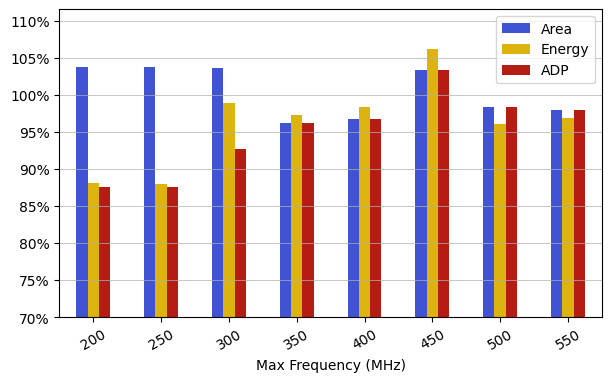

In [19]:
# colors = ['#1779ba', '#ffab00', '#36b37e', '#ff5630']
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']

ax = gain_df.plot.bar(
    rot=30,
    color=colors,
    figsize=(7,4)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_yticks(range(70, 110+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
plt.ylim(70)
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.12, 1))
plt.legend(loc='best')
# plt.title('Hardware requirements of HUB Posit multiplier with respect to standard multiplier')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5)

plt.savefig('figs/mult_rate.pdf', bbox_inches="tight")
plt.show()

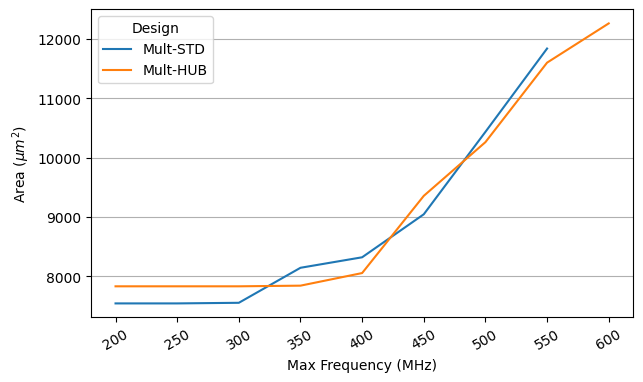

In [20]:
ax1 = area_df.plot.line(
	y="Area",
	rot = 30,
	ylabel="Area ($\mu m^2$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 600+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = area_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_area.pdf', bbox_inches="tight")
plt.show()

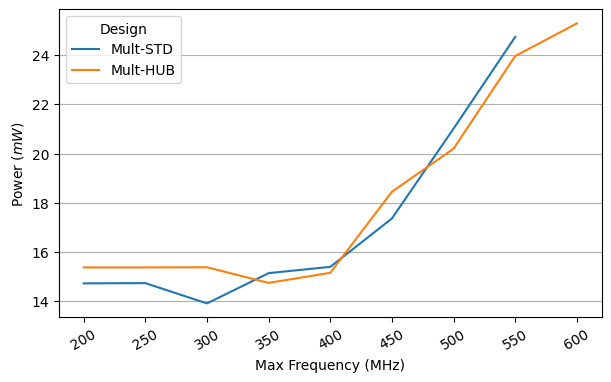

In [21]:
ax1=power_df.plot.line(
	y="Power",
	rot = 30,
	ylabel="Power ($mW$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 600+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_power.pdf', bbox_inches="tight")
plt.show()

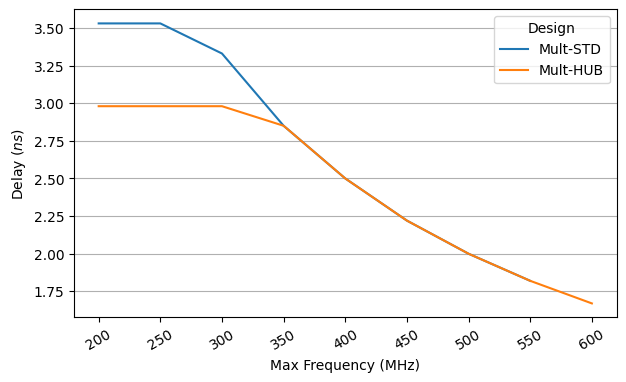

In [22]:
ax1=delay_df.plot.line(
	y="Delay",
	rot = 30,
	ylabel="Delay ($ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 600+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_delay.pdf', bbox_inches="tight")
plt.show()

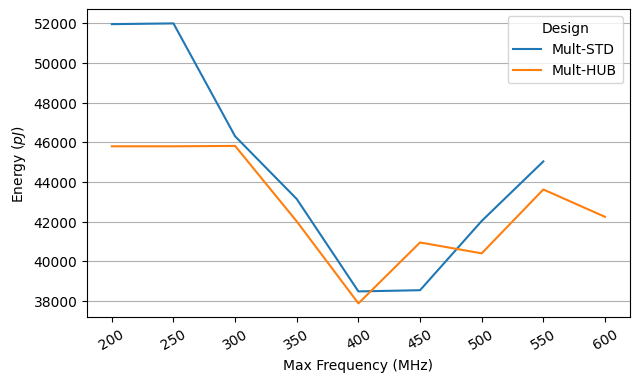

In [23]:
ax1=energy_df.plot.line(
    y="Energy",
    rot = 30,
    ylabel="Energy ($pJ$)",
    figsize=(7,4)
)
ax1.set_xticks(range(200, 600+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_energy.pdf', bbox_inches="tight")
plt.show()

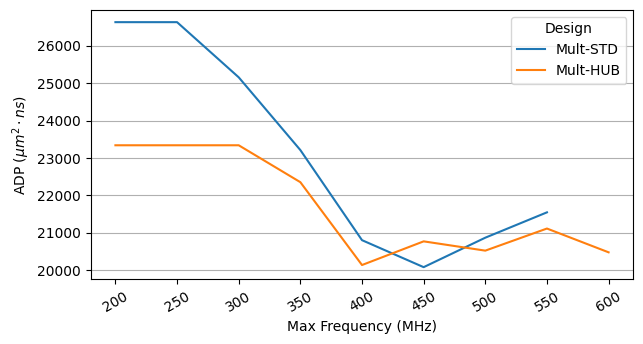

In [24]:
ax1=ADP_df.plot.line(
	y="ADP",
	rot = 30,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7,3.5)
)
ax1.set_xticks(range(200, 600+1, 50))
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_adp.pdf', bbox_inches="tight")
plt.show()